In [1]:
#loading dependencies
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

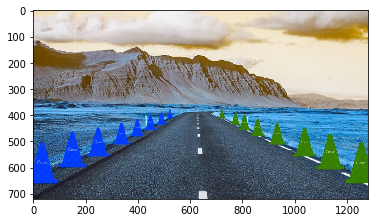

In [2]:
#Loading Image
image = cv2.imread("contour.jpeg")
plt.imshow(image)
plt.show()

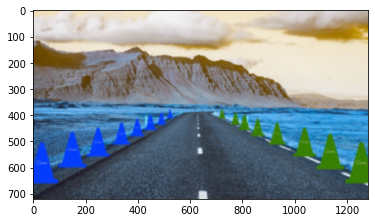

In [3]:
#Blurring
blurred = cv2.GaussianBlur(image, (15, 15), 0)
plt.imshow(blurred)
plt.show()

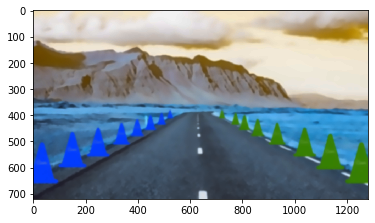

In [4]:
#Denoising
dst = cv2.fastNlMeansDenoisingColored(blurred,None,10,10,7,21)
plt.imshow(dst)
plt.show()

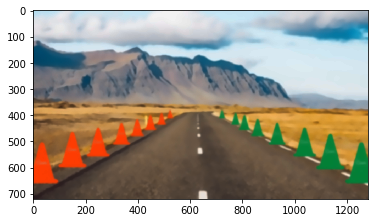

In [5]:
#BGR to RGB
rgb_img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

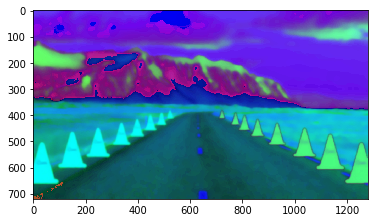

In [6]:
#RGB to HSV
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)
plt.show()

In [7]:
#----Mask formation for orange and green cone----

In [8]:
#Orange cone range of HSV
light_orange = (1, 200, 220)
dark_orange = (18, 255, 255)
#Orange cone mask
mask1 = cv2.inRange(hsv_img, light_orange, dark_orange)

In [9]:
#Green cone range of HSV
light_green = (36, 0, 0)
dark_green = (86, 255, 255)
#Green cone mask
mask2 = cv2.inRange(hsv_img, light_green, dark_green)

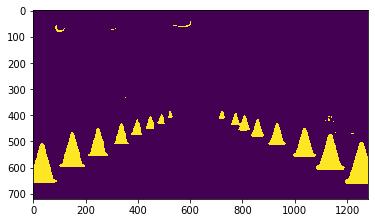

In [10]:
mask = mask1+mask2
plt.imshow(mask)
plt.show()

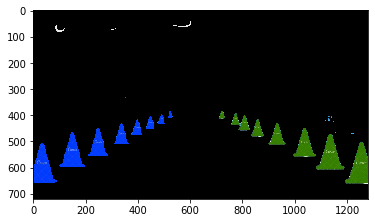

In [11]:
#Masked environment and cones
result = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(result)
plt.show()

In [12]:
#----Contour detection----

In [13]:
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

In [14]:
for c in cnts:
#Defining threshold values to prevent contouring of very small detected objects (noise)
    x = 266.0
    if cv2.contourArea(c) > x:
        x, y, w, h = cv2.boundingRect(c)
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        #cv2.drawContours(output, [c], 0, (0,255,0), 3)
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 3)
        cv2.circle(output, (cX, cY), 3, (0, 255, 0), -1)

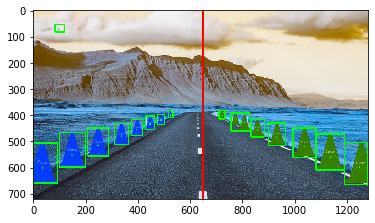

In [15]:
final = output.copy()
cv2.line(final, (650, 0), (650, 720), (255, 0, 0), 5)
plt.imshow(final)
plt.show()

In [16]:
#----Center to VF distance----

In [17]:
#Foot of perpendicular calculation
def findFoot(center_x, center_y):
    temp = -1 * (1 * center_x - 650) 
    foot_x = temp * 1 + center_x  
    foot_y = center_y  
    return (foot_x,foot_y)

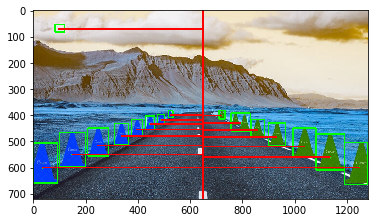

In [18]:
#Dist_left, dist_right calculation from center of each contour to viewfinder 
vf_top_point = (650, 0)
vf_top_point = np.asarray(vf_top_point)
vf_bottom_point = (650, 720)
vf_bottom_point = np.asarray(vf_bottom_point)
lst_dist = []
for c in cnts:
    x = 266.8
    if cv2.contourArea(c) > x:
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        center = (cX,cY)
        foot = findFoot(center[0],center[1])
        cv2.line(final, center, foot, (255, 0, 0), 3)
        center = np.asarray(center)
        dist_from_vf = np.cross(vf_bottom_point-vf_top_point, vf_top_point-center)/np.linalg.norm(vf_bottom_point-vf_top_point)
        lst_dist.append(dist_from_vf)
    
plt.imshow(final)
plt.show()

In [19]:
#List of distances from center of each contour to viewfinder 
#Negative value is dist_left, positive value is dist_right
lst_dist

[-614.0,
 597.0,
 485.0,
 -501.0,
 386.0,
 -402.0,
 -313.0,
 281.0,
 -254.0,
 207.0,
 -203.0,
 -161.0,
 144.0,
 -126.0,
 71.0,
 -553.0]

In [20]:
del lst_dist[-1]

In [21]:
lst_dist_left = [i for i in lst_dist if i <= 0]

In [22]:
lst_dist_left

[-614.0, -501.0, -402.0, -313.0, -254.0, -203.0, -161.0, -126.0]

In [23]:
lst_dist_right = [i for i in lst_dist if i > 0]

In [24]:
lst_dist_right

[597.0, 485.0, 386.0, 281.0, 207.0, 144.0, 71.0]